In [6]:
import scipy
from numpy.random import normal
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import matplotlib

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', size=12) 
%config InlineBackend.figure_format = 'svg'

In [7]:
np.random.seed(123)
noise = np.random.normal(0,.5,20)

fun = []
for i in np.linspace(0,4*3.14,20):
    fun.append(5.0+np.sin(i))
fun = np.array(fun)

x = np.array(range(0,20))

data = noise+fun

In [8]:
plt.plot(noise + fun,'.')

In [9]:
x.shape

(20,)

/Users/patrick/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


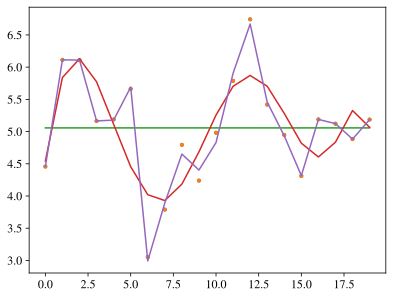

In [10]:
m0 = np.polyfit(x,data,0)
m1 = np.polyfit(x,data,8)
m2 = np.polyfit(x,data,20)

plt.plot(x,data,'.')
plt.plot(x,np.polyval(m0,x))
plt.plot(x,np.polyval(m1,x))
plt.plot(x,np.polyval(m2,x))

plt.show()



In [16]:
print(chisquare(data,np.polyval(m0,x))[0]/1.0)
print(chisquare(data,np.polyval(m1,x))[0]/8.0)
print(chisquare(data,np.polyval(m2,x))[0]/20.0)

2.6681857224511263
0.1427141311969165
0.001141868669505076


In [20]:
fig = plt.figure(figsize=(6.52437527778,4))
gs = plt.GridSpec(nrows=1, ncols=1,hspace=.5,wspace=.3)

ax = fig.add_subplot(gs[0,0])

ax.plot(data,'.')
ax.plot(np.polyval(m0,x),label='degree 0, $\chi^2$ = 2.66')
ax.plot(np.polyval(m1,x),label='degree 8, $\chi^2$ = 0.14')
ax.plot(np.polyval(m2,x),label='degree 20, $\chi^2$ = 0.0011')

ax.legend()
plt.savefig('overfit_underfit.pdf')  